# MTH9875 Homework 7

## Chenyu Zhao

### R version: 3.5.1

Assigned: October 17, 2019.
Due: October 31, 2019 by 6pm.

Late homework **will not be accepted**.

$$
\newcommand{\BS}{\text{BS}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\ee}[1]{\mathbb{E}\left[{#1}\right]}
\newcommand{\eef}[1]{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}
\newcommand{\Rplus}{\mathbb{R}_{\geqslant 0}}
\newcommand{\Rpplus}{\mathbb{R}_{> 0}}
\newcommand{\Rminus}{\mathbb{R}_{\leqslant 0}}
\newcommand{\p}{\partial}
\newcommand{\ui}{\textrm{i}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\angl}[1]{\langle{#1}\rangle}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\covf}[1]{\cov\left[\left.{#1}\right|\cF_t\right]}
\newcommand{\varf}[1]{\var\left[\left.{#1}\right|\cF_t\right]}
$$  

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Allen Chen (allen.long.chen@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### As usual, download some code

In [14]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/10/9875-7.zip", destfile="9875-7.zip")
unzip(zipfile="9875-7.zip")

source("BlackScholes.R")
source("Lewis.R")
source("Heston.R")
source("plotIvols.R")
source("sviArbitrage.R")
source("sviRoots.R")
source("sviFit0.R")
source("sviSqrtFit.R")
source("computeImpliedVols.R")
# source("sviFitQuarticRoots.R")
source("svi.R")

library(repr)
options(repr.plot.width=10,repr.plot.height=7)

### 1. (8 points)

Consider the surface SVI (SSVI) parameterization of $w(k,\theta_t) = \sigma_{\BS}(k,t)^2\,t$:

<a name="eq:ssvi"></a>(1)
$$
w(k,\theta_t)
= \frac{\theta_t}{2}\left\{1+\rho\,\varphi(\theta_t)\, k + \sqrt{\left(\varphi(\theta_t)\,{k}+\rho\right)^2
+(1-\rho^2 )}\right\}.
$$

For economy of notation, write $w(k,\theta_t)=w$, $\varphi(\theta_t)=\varphi$ and so on.

(a)

Show that the ATM total implied variance $w(0,\theta) = \theta$, and that the ATM total variance skew $\p_k w|_{k=0}= \rho\,\theta\,\varphi$.

(b)

Find expressions for the minimum $w^\star$ of the SSVI total implied variance smile and the log-strike $k^\star$ at which the minimum is attained.


### Answer

(a)

when ATM, $k=0$, such that

$$
w(0,\theta_t) = \frac{\theta}{2} \{1+\sqrt{\rho^2+1-\rho^2}\}=\theta
$$

$$
\p_k w(k,\theta)|_{k=0}=\left.\frac{\theta}{2}\left\{\rho\varphi+\frac{(\varphi k+\rho)\varphi}{\sqrt{(\varphi k+\rho)^2+(1-\rho^2)}}\right\}\right|_{k=0} =\rho\theta\varphi
$$

(b)

When $w$ is minimum, its first derivative must be 0, thus

$$
\p_kw = \frac{\theta}{2}\left\{\rho\varphi+\frac{(\varphi k+\rho)\varphi}{\sqrt{(\varphi k+\rho)^2+(1-\rho^2)}}\right\} = 0
$$

which is equivalent to

$$
2\rho^3+\varphi k \rho^2-2\rho-\varphi k=(2\rho+\varphi k)(\rho^2-1)=0
$$

so when $k^\star=-\frac{2\rho}{\varphi}$, the minimum $w^\star=\theta(1-\rho^2)$


### 2. (16 points)

Consider the Heston model with BCC parameters 


\begin{eqnarray*}
v&=& 0.04\\ \bar v &=& 0.04\\ \lambda&=&1.15\\ \eta&=&0.39\\\rho&=&-0.64.
\end{eqnarray*}


and set $T=1$ year as the time to expiry.


(a)

Plot the Heston 1-year implied variance smile with BCC parameters for log-strikes between $-1.0$ and $1.0$ using the Heston quasi-closed form formula.  As usual, nice formatting please!

(b)

Use the R function `optimize` to find the minimum $w^\star$ of the smile and the log-strike $k^\star$ at which the minimum is attained.

(c) 

Use the expressions you derived for $w^\star$ and $k^\star$ in part (b) of Problem 1 to fix values of $\theta$, $\rho$, and $\varphi$.

(d)  

Implement the SSVI formula in R. Superimpose a plot of the SSVI formula onto your smile plot from part (a).

(e)

Does SSVI fit the Heston smile? In what regime would you expect the SSVI formula to fit the Heston smile well?

### Answer

(a)

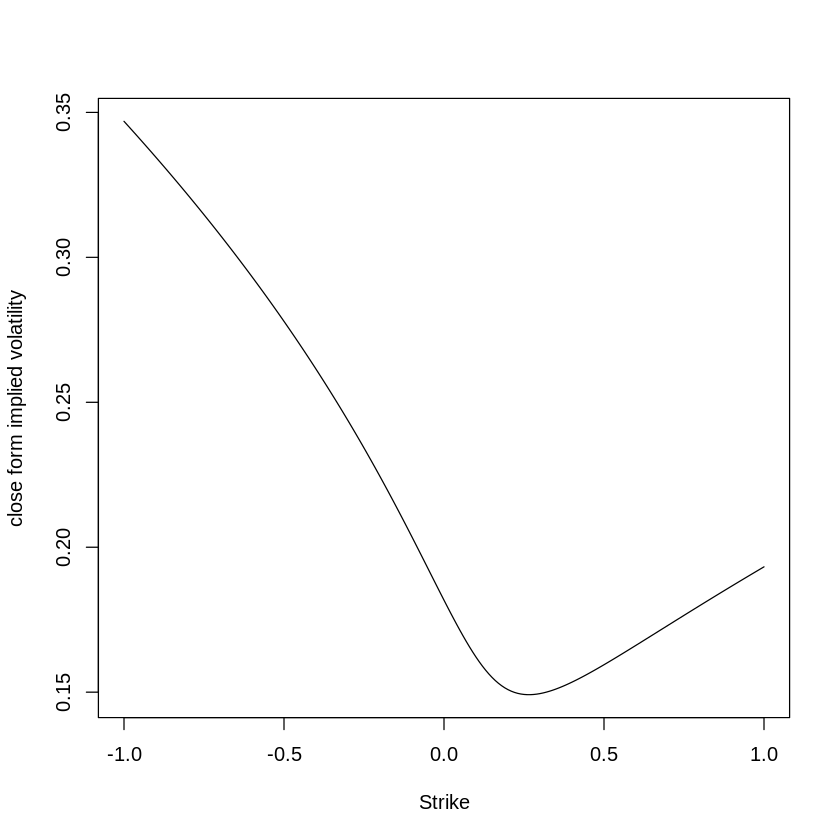

In [2]:
paramsBCC <- list(lambda=1.15,rho=-0.64,eta=0.39,vbar=0.04,v=0.04)
impvol_closeform<-function(k){sapply(k,function(k){impvol.phi(phiHeston(paramsBCC))(k, 1.0)})}

Ks<-seq(-1,1,0.01)
impvol_curve<-sapply(Ks,impvol_closeform)
plot(Ks,impvol_curve,type="l", xlab="Strike", ylab="close form implied volatility")

(b)

In [3]:
kstar<-optimize(impvol_closeform,c(-1, 1),tol = 0.0001)
print(kstar)

$minimum
[1] 0.2653245

$objective
[1] 0.149128



In [4]:
0.149128^2

[1] 0.02223916

so $k^\star=0.2653245$, and $w^\star=\sigma^\star T = 0.022239160384$

(c) 

$\rho=0.64$, and we have $k^\star=\frac{-2\rho}{\varphi}=0.2653245$, $w^\star=\theta(1-\rho^2)=0.022239160384$

we have $\theta=0.037668$, $\varphi=4.82428$

(d)

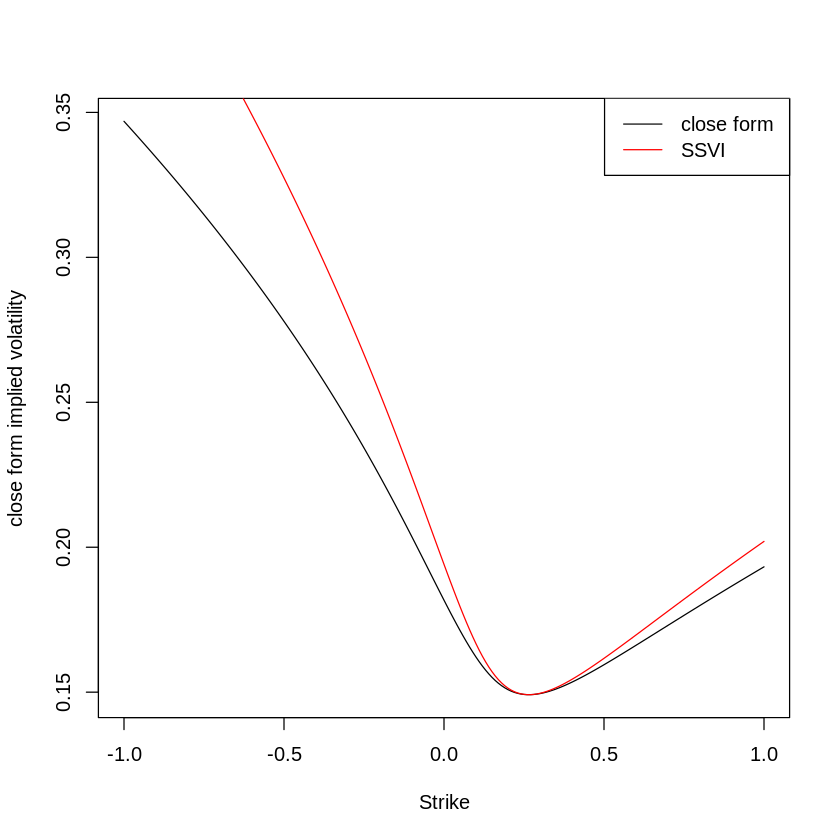

In [5]:
SSVI<-function(k){
    rho = -0.64
    theta = 0.037668
    phi = 4.82428
    return(sqrt(0.5*theta*(1+rho*phi*k+sqrt((phi*k+rho)*(phi*k+rho)+1-rho*rho))))
}

impvol_SSVI<-function(k) {sapply(k,function(k) {SSVI(k)})}

Ks<-seq(-1,1,0.01)
impvol_curve<-sapply(Ks,impvol_closeform)
SSVI_curve<-sapply(Ks,impvol_SSVI)
plot(Ks,impvol_curve,type="l", xlab="Strike", ylab="close form implied volatility")
lines(Ks,SSVI_curve,col="red")
legend("topright",legend=c("close form", "SSVI"),col=c("black", "red"), lty=c(1,1))

(e) 

No, SSVI does not fit the Heston smile. In regime that maturity is very large, We expect the SSVI can fit the Heston smile well.

## SVI fits are still sometimes quite good

For the final problem, you will need SPX implied volatilities from November 13, 2017, a date that has been carefully cherry-picked by me (in the style of some research in the social sciences).

In [6]:
load("spxIvols20171113.rData")

In [7]:
options(repr.plot.width=15,repr.plot.height=12)

### 3. (12 points)

(a) Fit SVI to the SPX implied volatilities in `spxIvols20181113`.

(b) Plot smiles and SVI fits using the function `plotIvols`.

(c) Plot smiles for the 3rd and 30th slices respectively.

(d) Draw a log-log plot of ATM skew vs time to expiry.
    
(e) Why do you think I chose this particular day?


### Answer

(a)

there is no spxIvols20181113 data in unpack files, I will regard it as a typo and use spxIvols20171113 data.

In [20]:
fit <- sviFit(spxIvols20171113)

(b)

Warning message in sqrt(svi(sviMatrix[slice, ], k)/t):
“NaNs produced”Warning message in sqrt(svi(sviMatrix[slice, ], k)/t):
“NaNs produced”

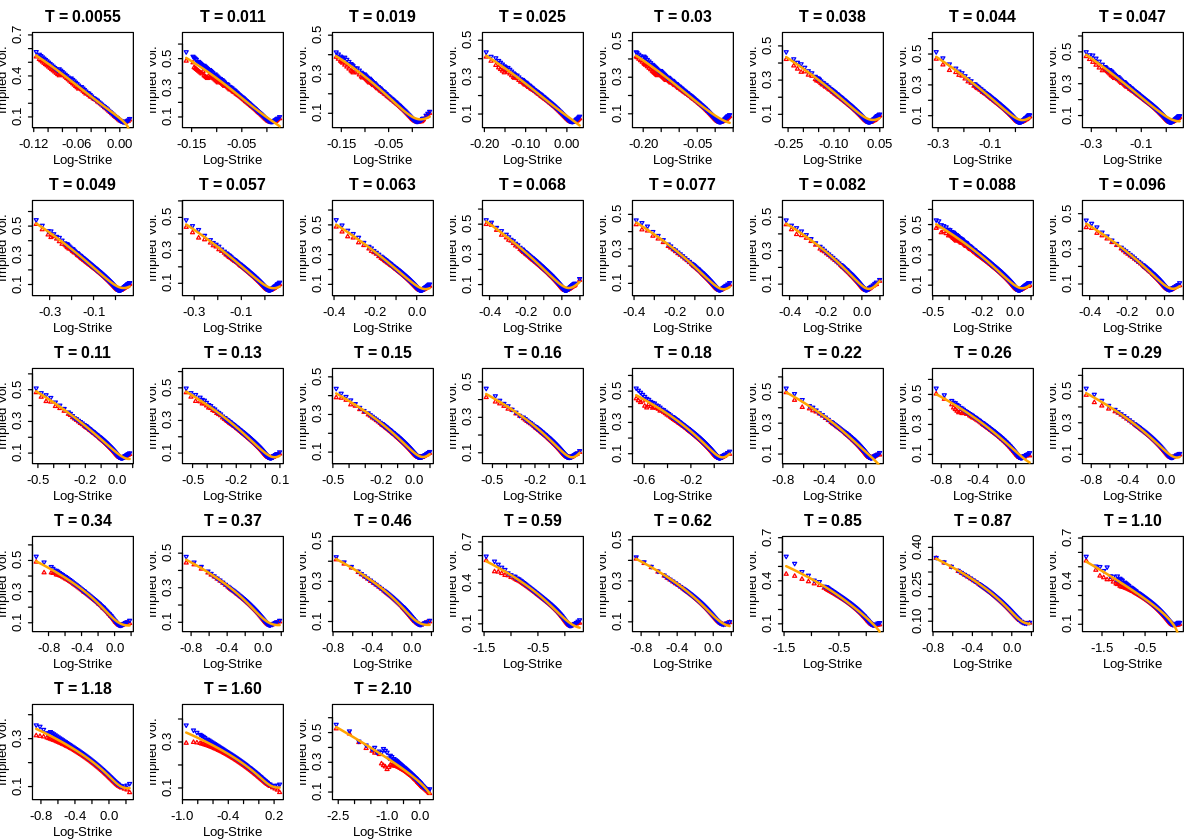

In [21]:
res <- plotIvols(spxIvols20171113, fit) 

(c)

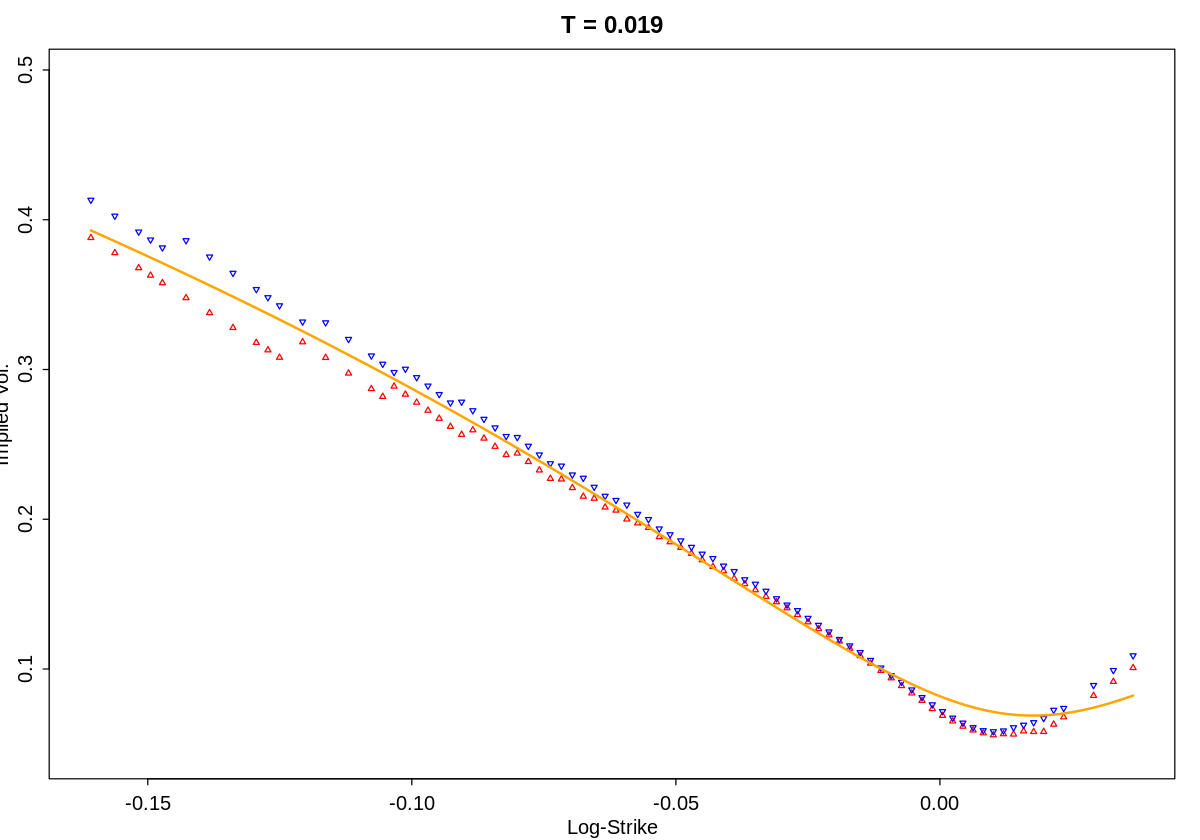

In [27]:
res_2 <- plotIvols(spxIvols20171113, fit, slices=3)

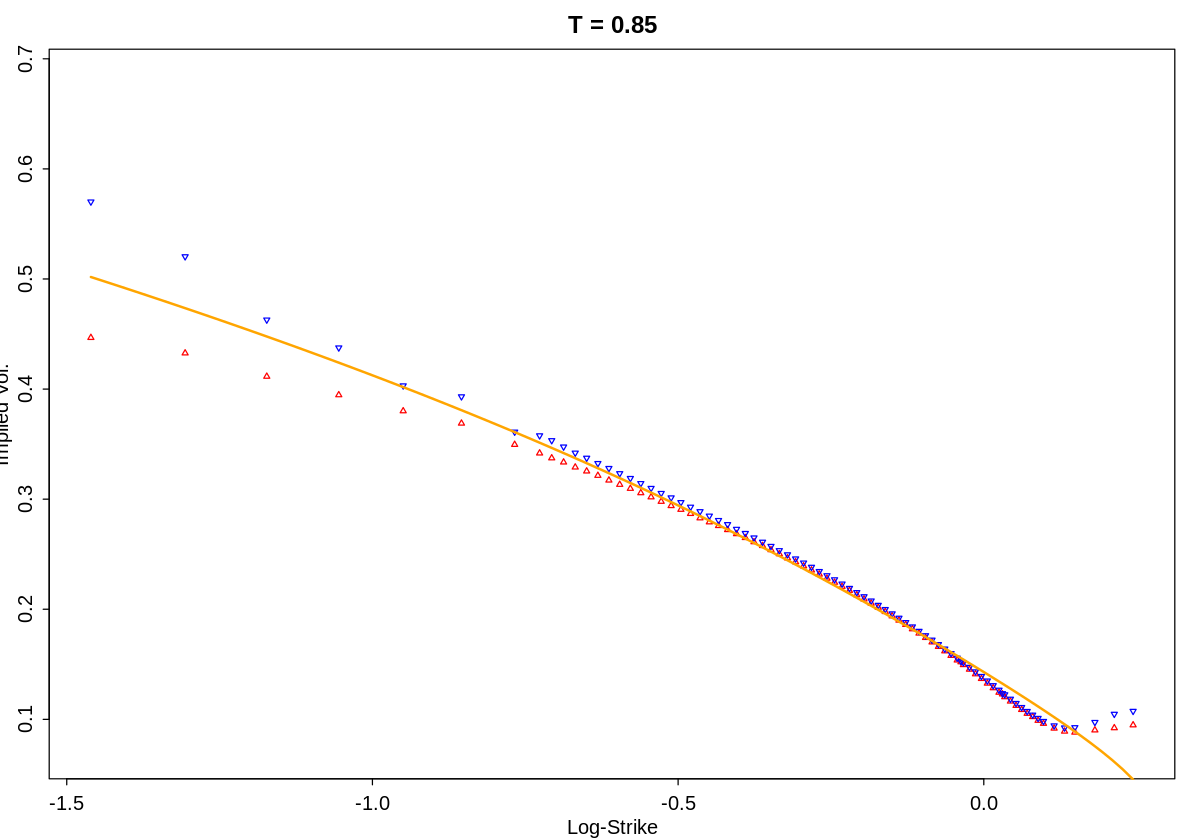

In [26]:
res_3 <- plotIvols(spxIvols20171113, fit, slices=30)

(d)

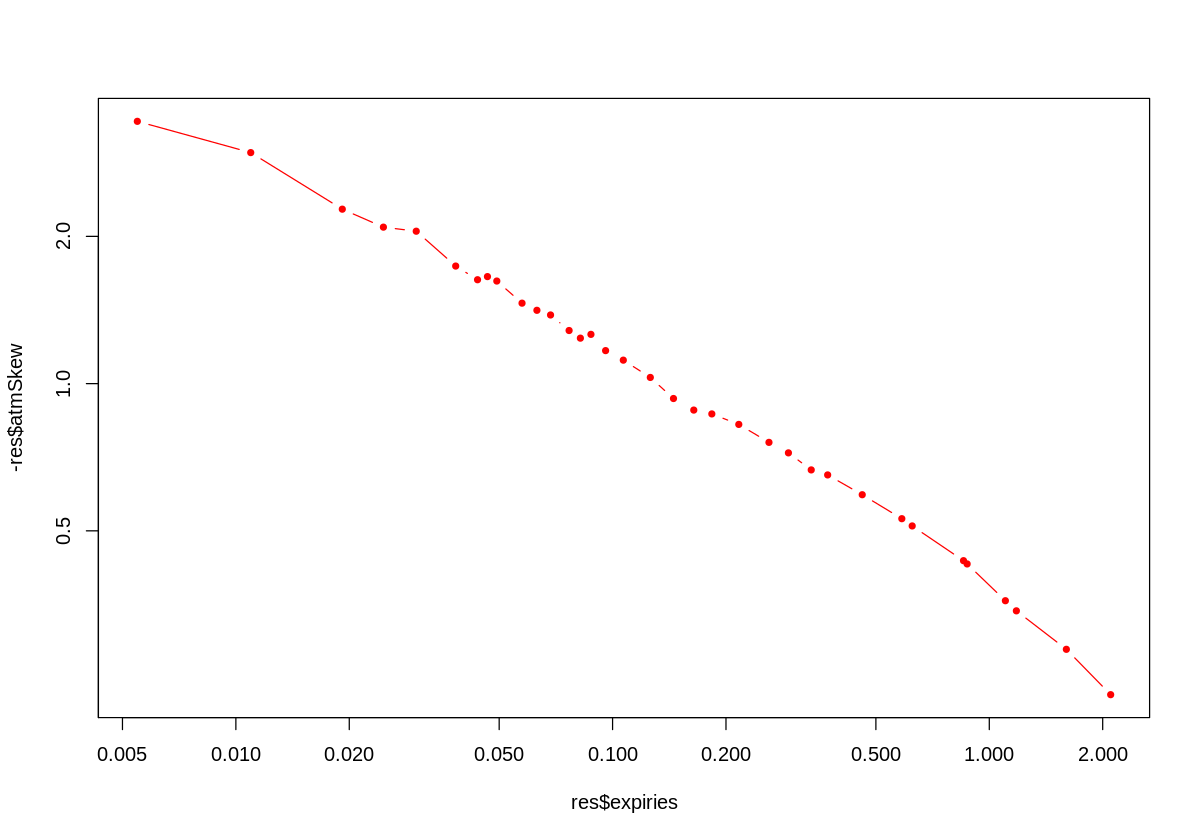

In [31]:
plot(res$expiries,-res$atmSkew,log="xy",type="b",col="red",pch=20)

(e)

On 11/13/2017, Trump declared on Pacific Rim Summit that he would refuse any trade which is unfair to United States. This announcement caused low liquidity of equity market, thus made option's liquidity decrease and bid/ask spread increase. Under this situation, SVI model is valid.